In [2]:
import pandas as pd
df = pd.read_csv('ds_salaries.csv')
print(df.head(10))

   Unnamed: 0  work_year experience_level employment_type  \
0           0       2020               MI              FT   
1           1       2020               SE              FT   
2           2       2020               SE              FT   
3           3       2020               MI              FT   
4           4       2020               SE              FT   
5           5       2020               EN              FT   
6           6       2020               SE              FT   
7           7       2020               MI              FT   
8           8       2020               MI              FT   
9           9       2020               SE              FT   

                    job_title    salary salary_currency  salary_in_usd  \
0              Data Scientist     70000             EUR          79833   
1  Machine Learning Scientist    260000             USD         260000   
2           Big Data Engineer     85000             GBP         109024   
3        Product Data Analyst   

In [6]:
missing_val = df.isnull().sum()
print("missing values in each column \n \n",missing_val)
dtypes_col = df.dtypes
print("\n \n \n")
print("Datatypes of the columns \n \n",dtypes_col)

missing values in each column 
 
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

 
 

Datatypes of the columns 
 
 Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


In [7]:
#Handle the missing values appropriately (e.g., fill with mean/median/mode or drop).

#dataset has no null values

categorical_cols = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
for col in categorical_cols:
    df[col] = df[col].astype('category')



In [8]:
'''3. Descriptive Analysis
• Calculate descriptive statistics for numerical columns.
• Perform group-by operations and aggregation to find meaningful insights.
- TASK 3: Find number of employees based on
1. Years of Experience
2. Job Title
3. Salary_Currency

Question 3: What are the mean, median, and standard deviation of the numerical
columns? Provide insights from group-by operations.'''


describe_df = df.describe()
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [9]:
experience_group = df.groupby('experience_level').size()
print("Number of employees based on years of experience:")
print(experience_group)

job_title_group = df.groupby('job_title').size()
print("\nNumber of employees based on job title:")
print(job_title_group)

currency_group = df.groupby('salary_currency').size()
print("\nNumber of employees based on salary currency:")
print(currency_group)

Number of employees based on years of experience:
experience_level
EN     88
EX     26
MI    213
SE    280
dtype: int64

Number of employees based on job title:
job_title
3D Computer Vision Researcher                 1
AI Scientist                                  7
Analytics Engineer                            4
Applied Data Scientist                        5
Applied Machine Learning Scientist            4
BI Data Analyst                               6
Big Data Architect                            1
Big Data Engineer                             8
Business Data Analyst                         5
Cloud Data Engineer                           2
Computer Vision Engineer                      6
Computer Vision Software Engineer             3
Data Analyst                                 97
Data Analytics Engineer                       4
Data Analytics Lead                           1
Data Analytics Manager                        7
Data Architect                               11
Data Engineer

C:\Users\Omesh\AppData\Local\Temp\ipykernel_18736\202551062.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_group = df.groupby('experience_level').size()
C:\Users\Omesh\AppData\Local\Temp\ipykernel_18736\202551062.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  job_title_group = df.groupby('job_title').size()
C:\Users\Omesh\AppData\Local\Temp\ipykernel_18736\202551062.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silenc

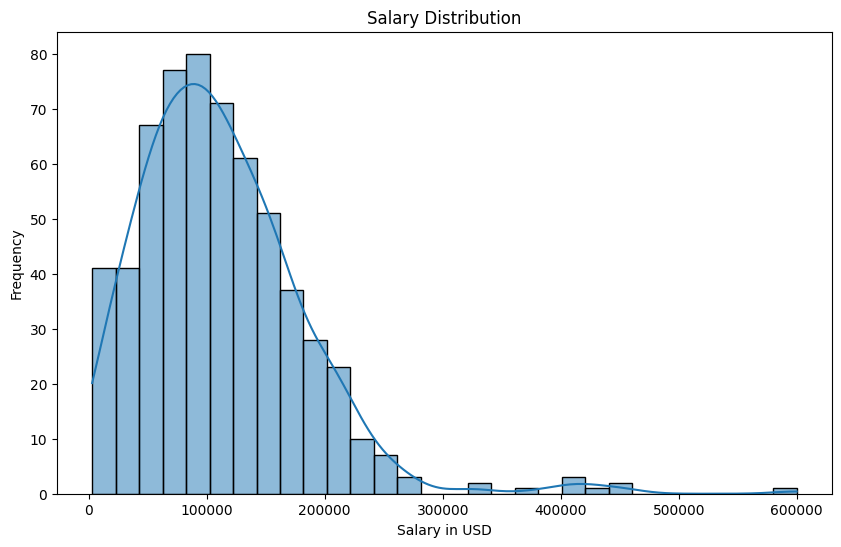

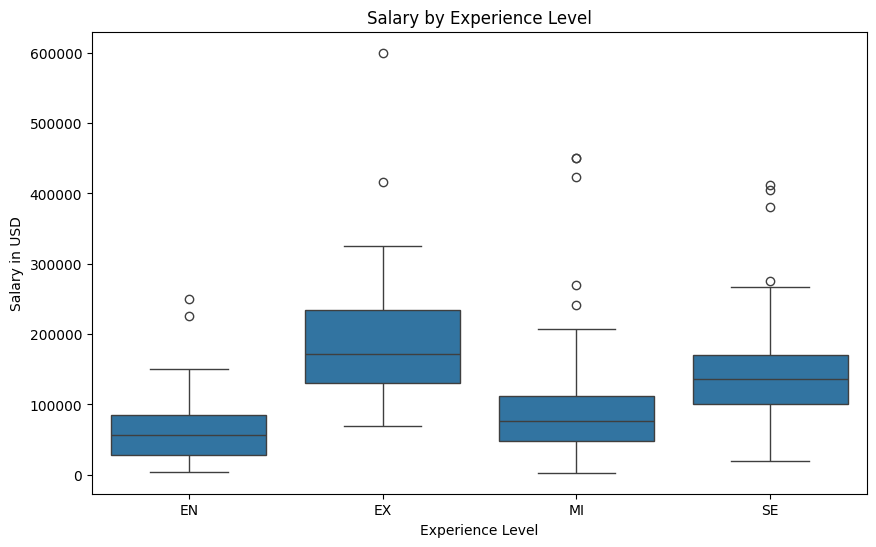

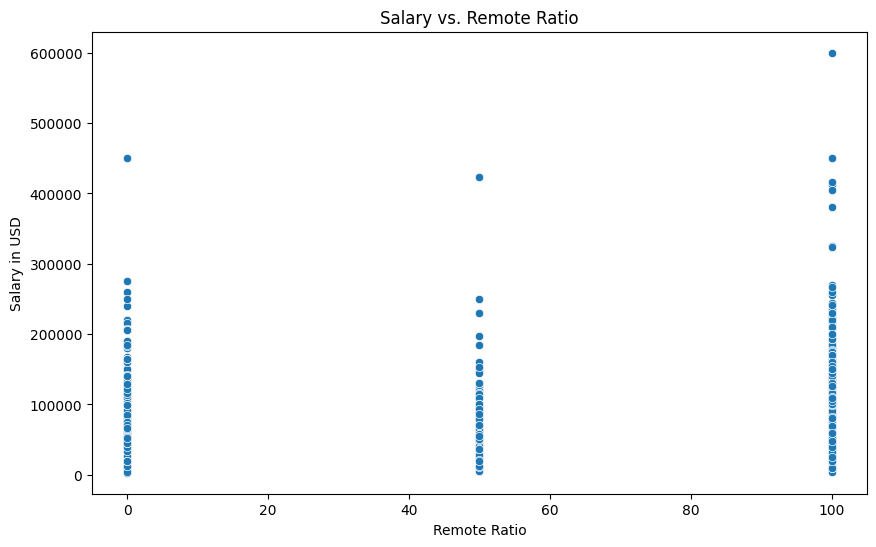

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Salary Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Salaries by Experience Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

# Scatter Plot of Salary vs. Remote Ratio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Salary vs. Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()


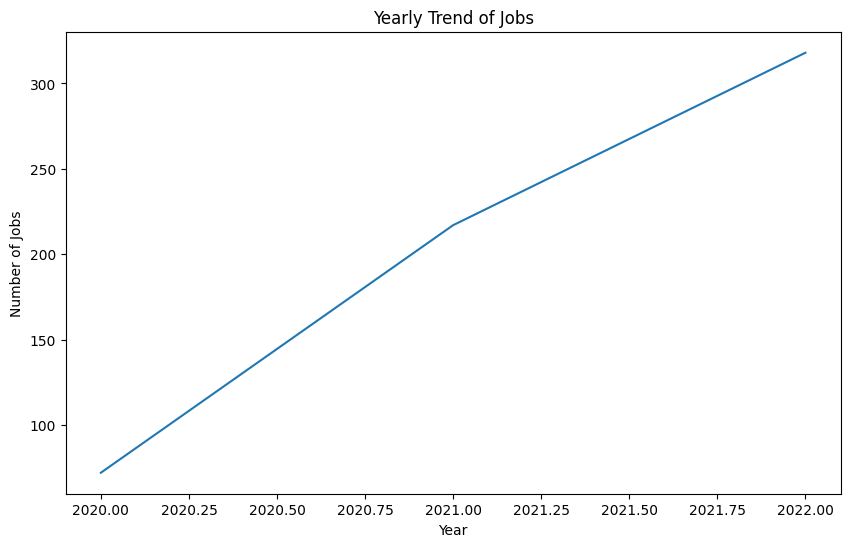

In [12]:
# Assuming 'work_year' is a column in the dataset
yearly_trend = df.groupby('work_year').size()
plt.figure(figsize=(10, 6))
yearly_trend.plot(kind='line')
plt.title('Yearly Trend of Jobs')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.show()


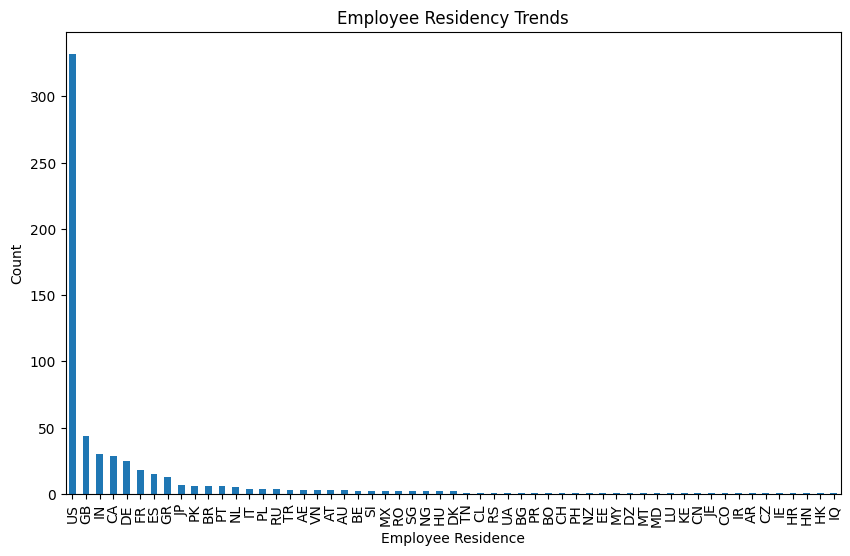

In [13]:
residency_trends = df['employee_residence'].value_counts()
plt.figure(figsize=(10, 6))
residency_trends.plot(kind='bar')
plt.title('Employee Residency Trends')
plt.xlabel('Employee Residence')
plt.ylabel('Count')
plt.show()


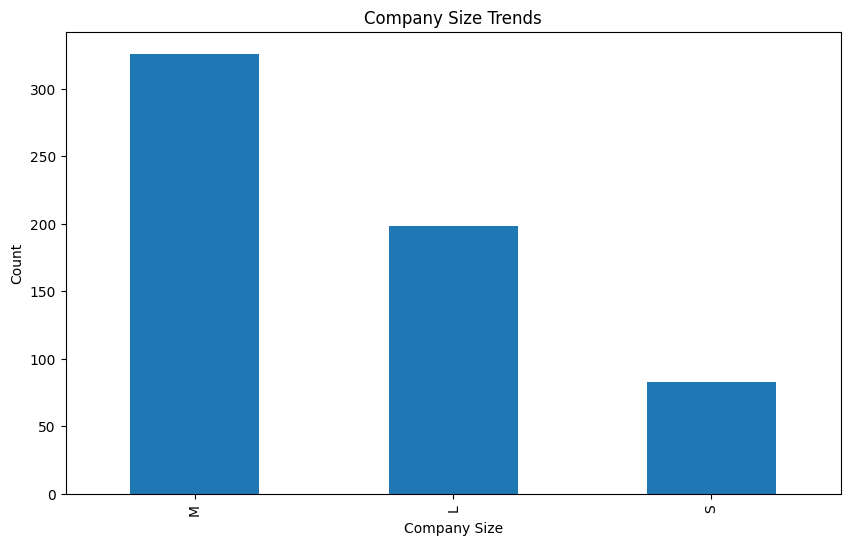

In [14]:
company_size_trends = df['company_size'].value_counts()
plt.figure(figsize=(10, 6))
company_size_trends.plot(kind='bar')
plt.title('Company Size Trends')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()
